In [1]:
from fastai.vision.all import *
import timm

In [2]:
path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=RegexLabeller(pat = r'^([^/]+)_\d+'),
    item_tfms=Resize(224))

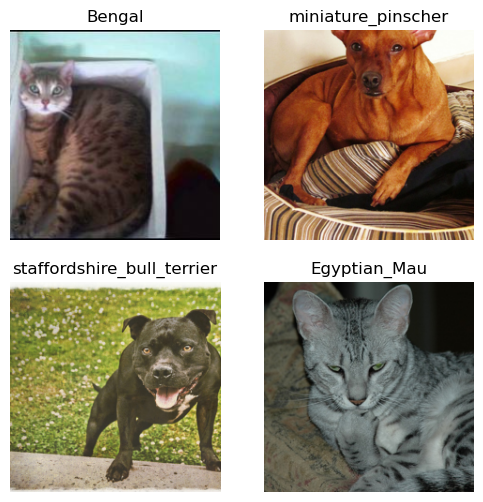

In [4]:
dls.show_batch(max_n=4)

In [5]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /home/mardos/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|████████████████████████████████████████████████████████████████████████████████████████████| 83.3M/83.3M [00:07<00:00, 11.0MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.504068,0.407503,0.135318,05:04


epoch,train_loss,valid_loss,error_rate,time
0,0.410806,0.376397,0.127199,07:40
1,0.270182,0.319379,0.096076,07:55
2,0.126213,0.276442,0.079161,08:20


In [6]:
timm.list_models('convnext')

[]

In [7]:
learn = vision_learner(dls, 'convnext_tiny_in22k', metrics=error_rate).to_fps16()
learn.fine_tune(3)

/home/mardos/anaconda3/lib/python3.11/site-packages/timm/models/_factory.py:117: UserWarning: Mapping deprecated model name convnext_tiny_in22k to current convnext_tiny.fb_in22k.
  model = create_fn(


model.safetensors:   0%|          | 0.00/178M [00:00<?, ?B/s]

AttributeError: 'Sequential' object has no attribute 'to_fps16'

In [ ]:
learn.export('model.pkl')